# Jupyter Notebook for Perceptron
Auto-generated notebook.

In [320]:
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 

from erudition.learning.helpers.plots.plotly_render import render, scatter

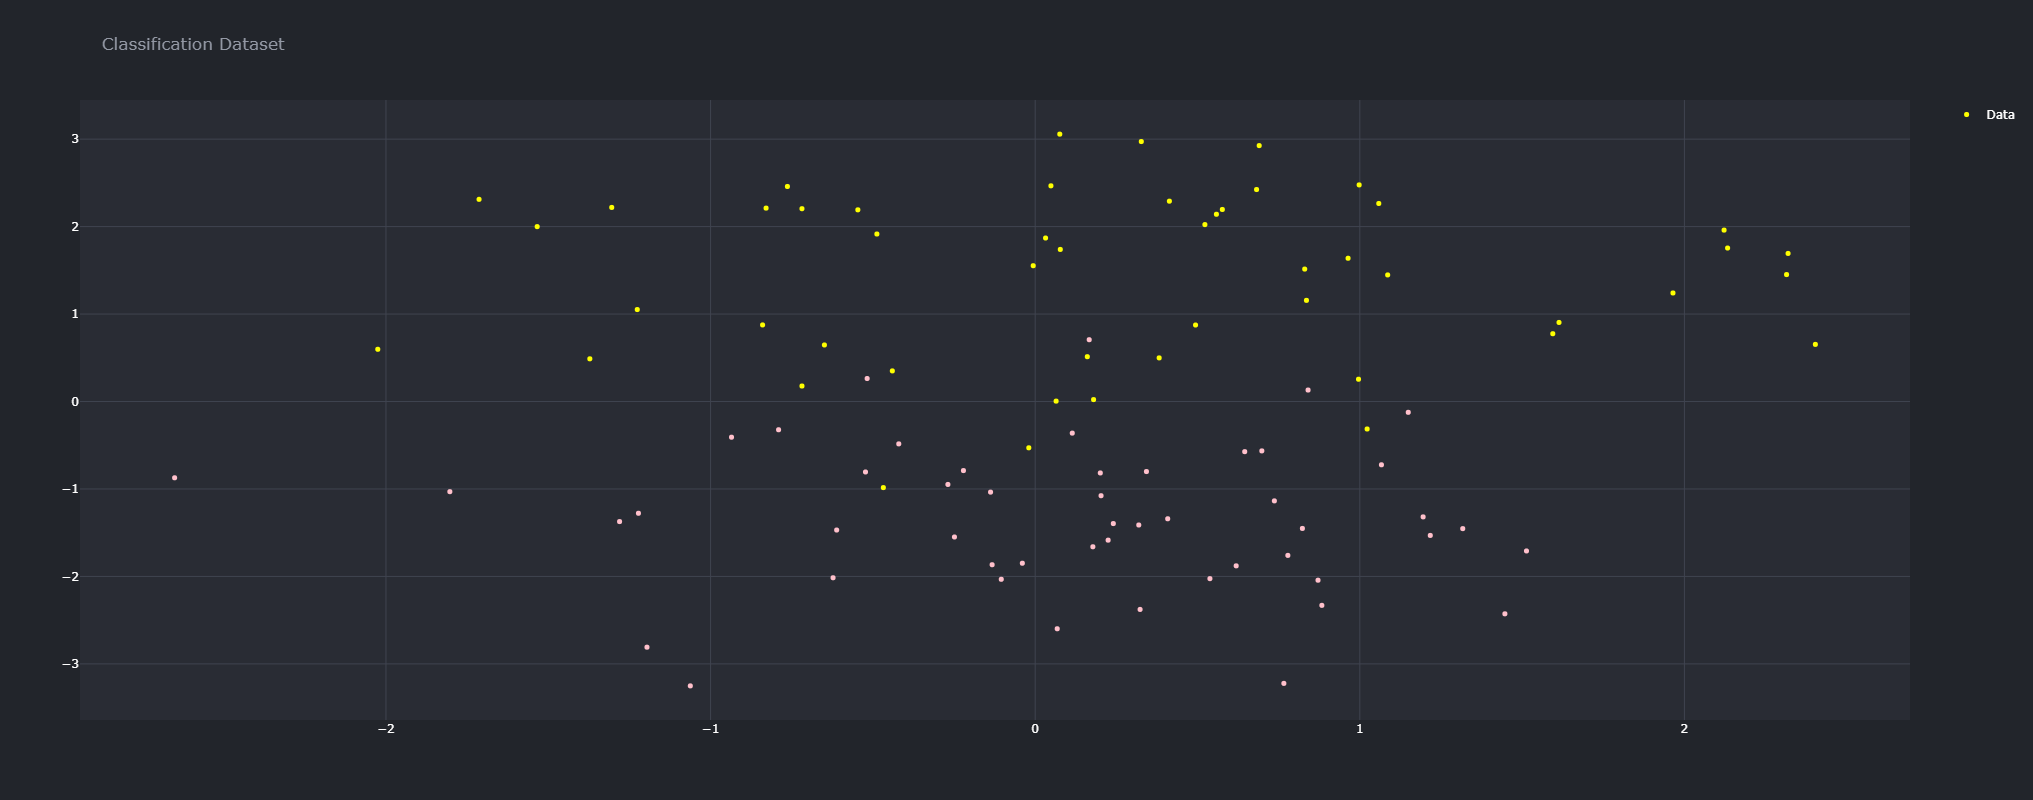

In [392]:
X,y  = make_classification(n_classes=2, n_clusters_per_class=2, random_state=42, n_samples=100, class_sep=1.5, shift=0)
X = X[:,:2]
fig = go.Figure(data=[scatter(X[:,0], X[:,1], 'Data', mode='markers', size=5, opacity=1, color = [['yellow', 'pink', 'orange', 'white'][a] for a in y])])
render(fig, title='Classification Dataset', height=800, width=800)

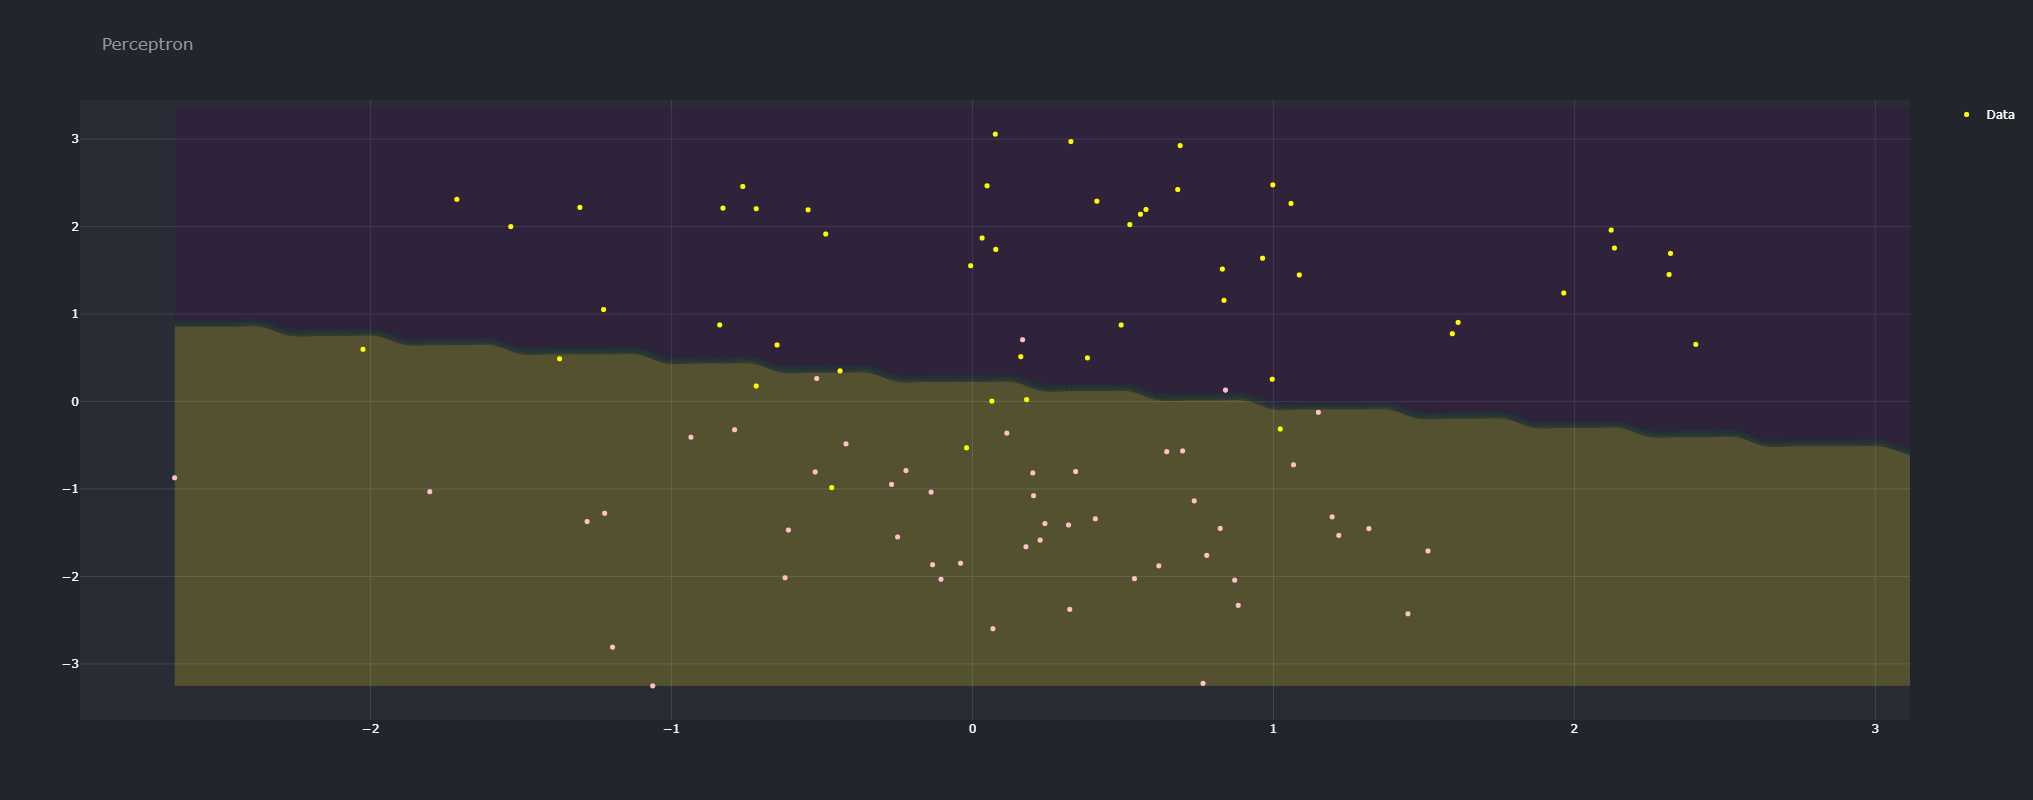

In [399]:
X,y  = make_classification(n_classes=2, n_clusters_per_class=2, random_state=42, n_samples=100, class_sep=1.5, shift=0)
X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X,y)

std_clf = make_pipeline(StandardScaler(), Perceptron(n_jobs=-1, tol=1e-3, random_state=42))
std_clf.fit(X_train, y_train)

xf = scalar.fit(X)

# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()+1
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = std_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = go.Figure(data=[
    scatter(X[:,0], X[:,1], 'Data', mode='markers', size=5, opacity=1, color = [['yellow', 'pink', 'orange', 'white'][a] for a in y]),
    go.Contour(
        z=Z,
        x=np.linspace(x_min, x_max, Z.shape[0]),
        y=np.linspace(y_min, y_max, Z.shape[1]),
        #contours_coloring='lines',
        opacity=0.2,
        showlegend=False,
        showscale=False,
        colorscale='viridis',
    )
    ])
render(fig, title='Perceptron', height=800, width=800)



training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


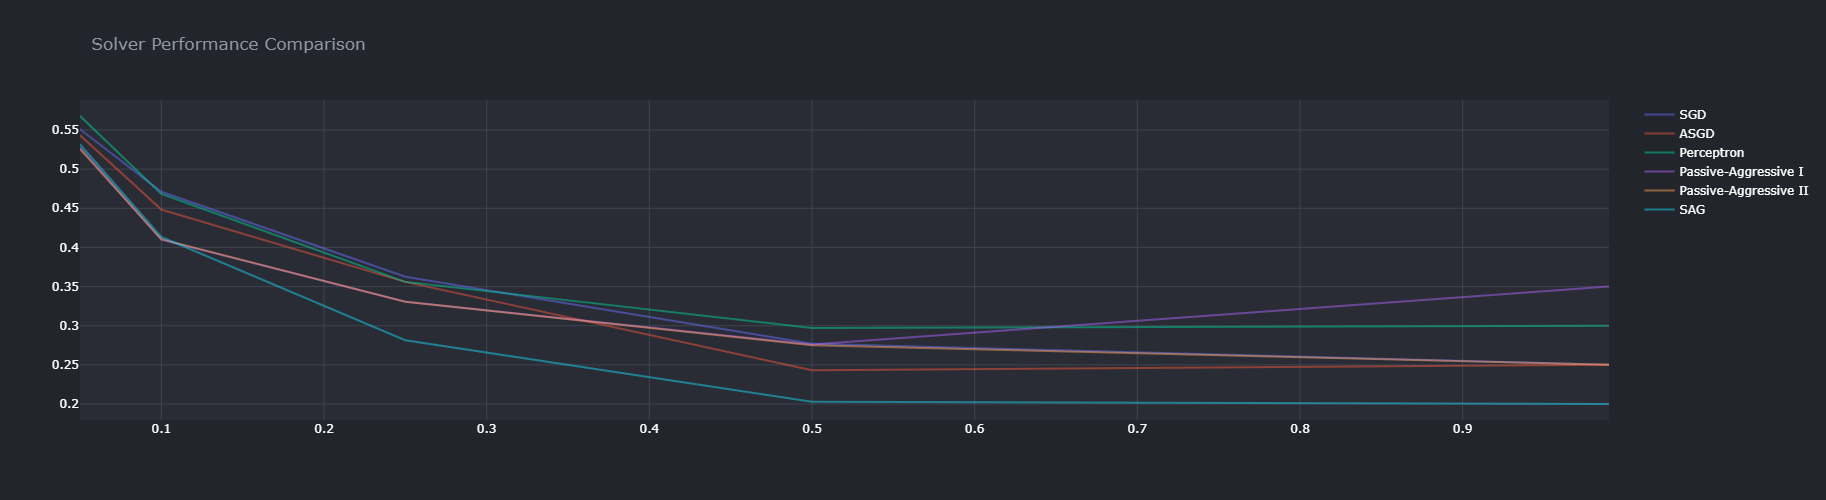

In [280]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
X,y  = make_classification(n_classes=4, n_clusters_per_class=1, random_state=42)

classifiers = [
    ("SGD", SGDClassifier(max_iter=100)),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge', C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge', C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(multi_class='auto', solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

plts = []

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))

    plts.append(scatter(xx,yy, name))

fig = go.Figure(data=plts)
render(fig, title='Solver Performance Comparison', width=1000)


# Perceptron from scratch

In [297]:
class Perceptron(object):
    
    def __init__(self, n_inputs, threshold=100, alpha=0.01):
        self.threshold = threshold
        self.alpha = alpha
        self.weights = np.zeros(n_inputs+1)
        
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            return 1
        else:
            return 0
    
    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.alpha * (label - prediction) * inputs
                self.weights[0] += self.alpha * (label - prediction)
            

In [300]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
perceptron.predict(inputs) 
#=> 1

inputs = np.array([0, 1])
perceptron.predict(inputs) 

0